In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_iris

In [7]:
iris=load_iris()

In [32]:
x=iris.data[:,2]
y=iris.data[:,3]

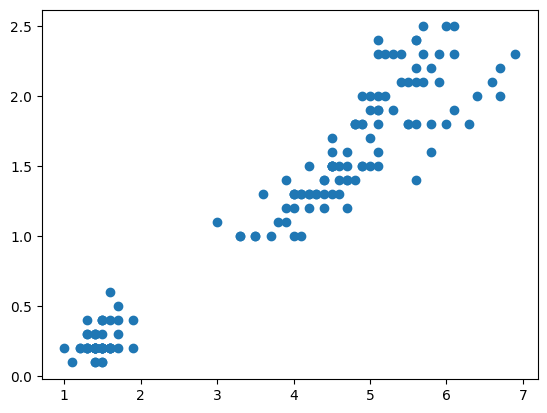

In [33]:
plt.scatter(x,y)

In [46]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [51]:
linear_reg=LinearRegression()

In [52]:
linear_reg.fit(x,y)

LinearRegression()

In [53]:
y_predict=linear_reg.predict(x)

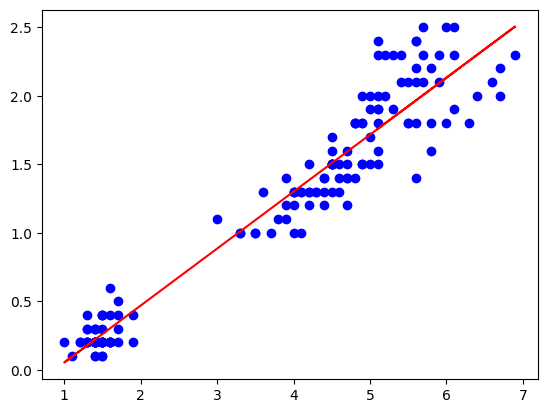

In [76]:
plt.scatter(x,y,c='blue')
plt.plot(x,y_predict,c='red')

In [71]:
linear_reg.score(x,y)

0.9271098389904927

In [72]:
linear_reg.score(x,y_predict)

1.0

In [87]:
from sklearn.datasets import fetch_california_housing

In [93]:
california=fetch_california_housing()

In [129]:
x_train,x_test,y_train,y_test=train_test_split(california.data,california.target,test_size=.3,random_state=42)

In [133]:
reg_california=LinearRegression()

In [138]:
reg_california.fit(x_train,y_train)

LinearRegression()

In [139]:
y_predict_california=reg_california.predict(x_test)

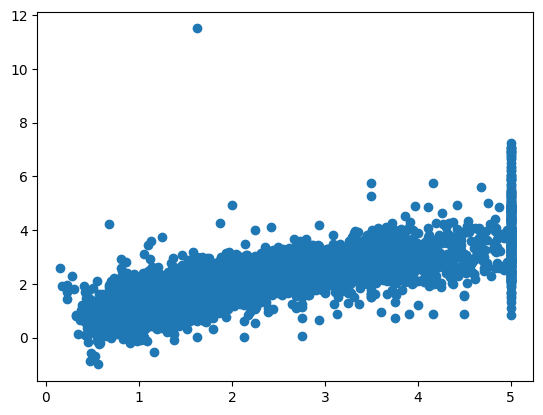

In [256]:
plt.scatter(y_test,y_predict_california)

In [264]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error

In [277]:
mse=mean_squared_error(y_test,y_predict_california)
rmse=root_mean_squared_error(y_test,y_predict_california)
rmse2=np.sqrt(mse)

In [278]:
mse

0.5305677824766757

In [279]:
rmse

0.7284008391515455

In [280]:
rmse2

0.7284008391515455

In [282]:
california.data.shape

(20640, 8)

In [284]:
x_train2,x_test2,y_train2,y_test2=train_test_split(california.data[:,[0,1,2]],california.target,test_size=.3)

In [285]:
reg_california2=LinearRegression()

In [286]:
reg_california2.fit(x_train2,y_train2)

LinearRegression()

In [287]:
y_predict_california2=reg_california2.predict(x_test2)

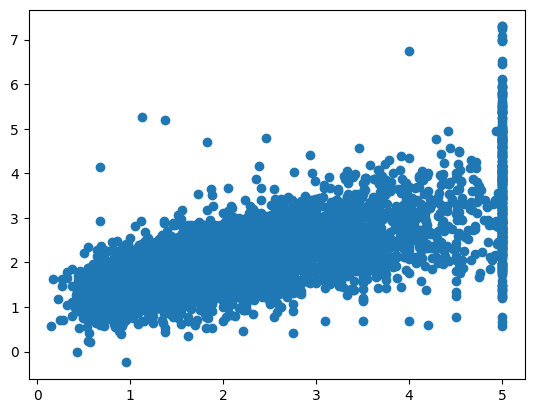

In [288]:
plt.scatter(y_test2,y_predict_california2)

In [289]:
mse2=mean_squared_error(y_test2,y_predict_california2)
rmse2=root_mean_squared_error(y_test2,y_predict_california2)

In [290]:
mse2

0.6572603152659386

In [291]:
rmse2

0.8107159276009931

In [292]:
reg_california.score(x_train,y_train)

0.609345972797216

In [293]:
reg_california.score(x_test,y_test)

0.595770232606166

In [294]:
reg_california.score(x_test,y_predict_california)

1.0

In [295]:
from sklearn.model_selection import cross_val_score

In [302]:
reg_cvs=LinearRegression()

In [305]:
cv_score=cross_val_score(reg_cvs,california.data,california.target,cv=5)

In [306]:
cv_score

array([0.54866323, 0.46820691, 0.55078434, 0.53698703, 0.66051406])

In [307]:
np.mean(cv_score)

0.5530311140279229

In [308]:
from sklearn.linear_model import Lasso

In [358]:
lasso=Lasso(alpha=.1)

In [359]:
lasso.fit(california.data,california.target)

Lasso(alpha=0.1)

In [365]:
lasso.score(california.data,california.target)

0.5452665703368436

In [361]:
lasso_coef=lasso.coef_
lasso_coef

array([ 3.90582557e-01,  1.50821512e-02, -0.00000000e+00,  0.00000000e+00,
        1.75019561e-05, -3.32253135e-03, -1.14214430e-01, -9.92250689e-02])

In [362]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

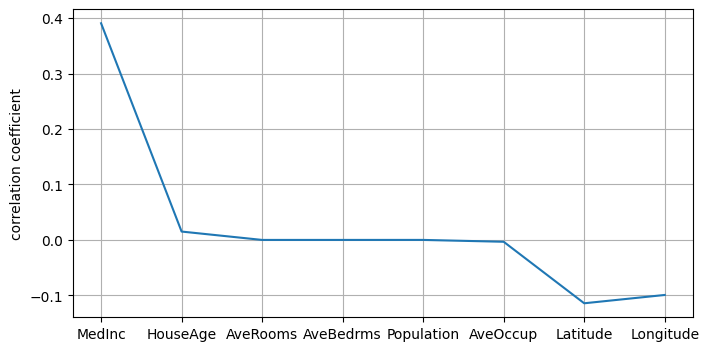

In [364]:
plt.figure(figsize=(8,4))
plt.plot(california.feature_names,lasso_coef)
plt.ylabel('correlation coefficient')
plt.grid()

In [366]:
from sklearn.linear_model import Ridge

In [367]:
ridge=Ridge(alpha=.1)

In [368]:
ridge.fit(california.data,california.target,)

Ridge(alpha=0.1)

In [370]:
ridge.score(california.data,california.target,)

0.6062326849340285

In [371]:
ridge.coef_

array([ 4.36683387e-01,  9.43593980e-03, -1.07303086e-01,  6.44965230e-01,
       -3.97578456e-06, -3.78652421e-03, -4.21312878e-01, -4.34510858e-01])

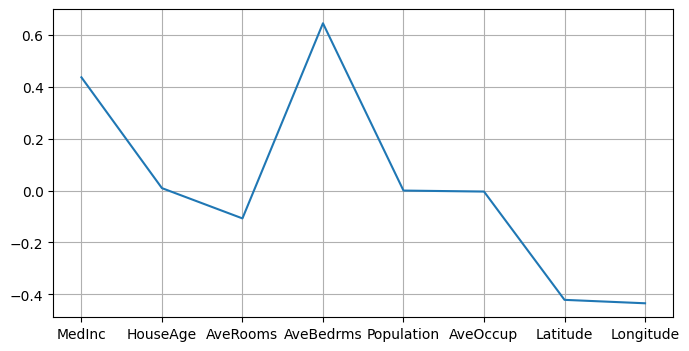

In [375]:
plt.figure(figsize=(8,4))
plt.plot(california.feature_names,ridge.coef_)
plt.grid()